In [ ]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append('/home/subhajit/Desktop/EPTA_comparison/notebooks')
from diff_chain import  Diff_chain_shift

In [ ]:
ucrn=getdist.mcsamples.loadMCSamples(file_root='./UCRN/del_trim_full', no_cache=True)

In [ ]:
hd=getdist.mcsamples.loadMCSamples(file_root='./HD/del_trim_full', no_cache=True)

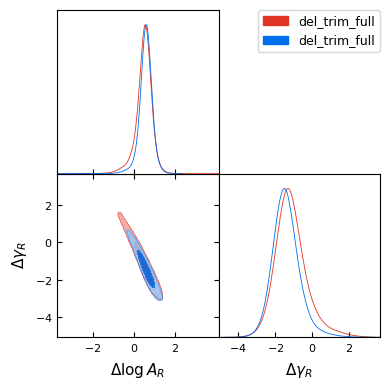

In [4]:
param_names = ucrn.getParamNames().getRunningNames()
g = plots.get_subplot_plotter()
g.triangle_plot([ucrn,hd], params=param_names, filled=True)

In [5]:
nsig_red_ucrn=1.03;nsig_red_hd=1.46;

In [6]:
names_red = ['logA_R','gamma_R']
labels_red=['\log A_{R}','\gamma_{R}']
del_names=['delta_logA_R','delta_gamma_R']

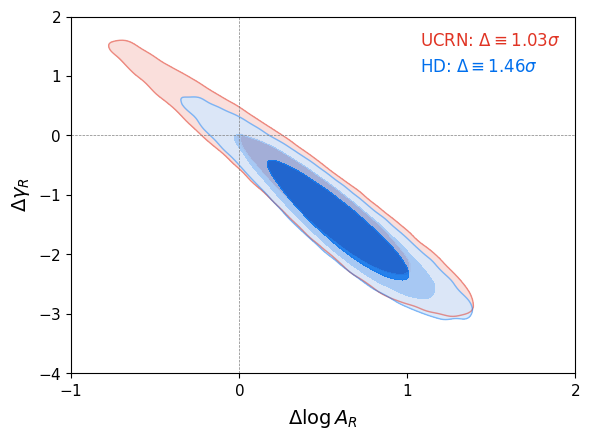

In [17]:
g = plots.get_single_plotter()
ucrn.updateSettings({'contours': [utilities.from_sigma_to_confidence(nsig_red_ucrn),0.68, 0.95]})
hd.updateSettings({'contours': [utilities.from_sigma_to_confidence(nsig_red_hd),0.68, 0.95]})
g.settings.num_plot_contours = 3
g.plot_2d([ucrn,hd],param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=[-1,2,-4,2])
g.add_legend(['UCRN: $\Delta\equiv$'+str(nsig_red_ucrn)+'$\sigma$',
              'HD: $\Delta\equiv$'+str(nsig_red_hd)+'$\sigma$'], colored_text=True)
# g.add_legend([ trim_red.getLabel()+' & '+full_red.getLabel()+ 
#               '\n $\Delta=$'+str("{:.2f}".format(nsig_red))+'$\sigma$'], colored_text=True);
g.add_x_marker(0)
g.add_y_marker(0)
plt.savefig('diff_trimvsfull_ucrn_hd.png',dpi=300)

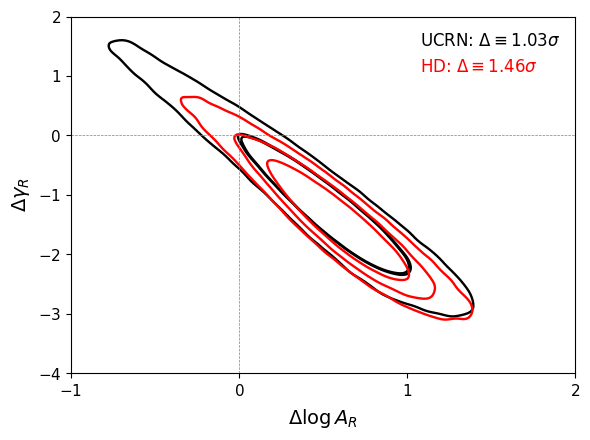

In [18]:
g = plots.get_single_plotter()
ucrn.updateSettings({'contours': [utilities.from_sigma_to_confidence(nsig_red_ucrn),0.68, 0.95]})
hd.updateSettings({'contours': [utilities.from_sigma_to_confidence(nsig_red_hd),0.68, 0.95]})
g.settings.num_plot_contours = 3
# ucrn.updateSettings({'contours': [utilities.from_sigma_to_confidence(nsig_red_ucrn)]})
# hd.updateSettings({'contours': [utilities.from_sigma_to_confidence(nsig_red_hd)]})
g.plot_2d([ucrn,hd],param1=del_names[0], param2=del_names[1], solid_colors='r',lims=[-1,2,-4,2])
g.add_legend(['UCRN: $\Delta\equiv$'+str(nsig_red_ucrn)+'$\sigma$',
              'HD: $\Delta\equiv$'+str(nsig_red_hd)+'$\sigma$'], colored_text=True)

g.add_x_marker(0)
g.add_y_marker(0)
plt.savefig('diff_trimvsfull_ucrn_hd_v2.png',dpi=300)